In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# question 1

In [0]:
#on cherche a minimiser E(j(w,z)) ou z=(x,y) est la variable aléatoire 
def j(x,y,w):
  return (y-np.sum(w*x))**2

def grad_j(x,y,w):
  return -2*x*(y-np.sum(w*x))

#On va prendre les vecteur de w dans la boule unité 
def proj_boule(w):
  if (np.linalg.norm(w)>1) : return w/np.linalg.norm(w)
  return w

In [0]:
def sgd(w0, epsilon, x, y):
  """
  w0 -> point initial 
  epsilon -> stop quand np.abs(w0-w1)<epsilon
  x -> feature data 
  y -> prediction data
  effectue une descente de gradient stochastque
  """
  step=1
  r = np.random.randint(0,len(x))
  w0=proj_boule(w0)
  w1=proj_boule(w0-grad_j(x[r,0:x.shape[1]],y[r],w0))
  while (np.linalg.norm(w1-w0)>epsilon):
    step+=1
    w0=w1
    r = np.random.randint(0,len(x))
    w1=proj_boule(w0-grad_j(x[r,0:x.shape[1]],y[r],w0)/step)
  return w1,step

def pred(w,x):
  """
  w -> vecteur qui defini la séparation
  x -> feature que l'on veut classer
  retourne y le label des xi
  
  """
  pred=np.ones(len(x))
  for i in range(len(x)):
    if (np.sum(x[i]*w)< 0) : pred[i]=-1 
  return pred
      
def error_rate(w,x,y):
  """
  compte le nombre de pred different de la vrai classe 
  et divise par le nombre total de prediction 
  """
  error=0
  p=pred(w,x)
  p-=y
  for i in range(len(p)):
    if (p[i]!=0) : error+=1
  return 100*error/len(p)

L'algorithme est le suivant : on initialise pour un certain w0 en suite a chaque étape on tire un z aléatoirement dans les données, on calcule le gradient en ce point et on met à jour w. On projéte a chaque fois dans la boule unité (si w* est solution lamba w* aussi). Comme condition d'arret j'ai choisi de prendre |wk+1-wk|<epsilon 

#question 2

In [0]:
wopt=np.array([-1,1])
x=np.random.rand(100,2)*10 # on génére des points aléatoirement dans [0,10]**2
y=np.ones(len(x))
for i in range(x.shape[0]):
  if (np.sum(x[i]*wopt)> 0) : y[i]=-1 

In [235]:
print(x[0:10],y[0:10])

[[5.87561824 3.0157308 ]
 [8.33016463 0.03633786]
 [6.01773164 6.2833823 ]
 [6.58177085 3.50881582]
 [1.26896074 0.03050757]
 [0.8892136  2.75321416]
 [9.30252091 1.4723074 ]
 [6.71153222 4.81483216]
 [0.51660187 3.1904851 ]
 [8.45119982 0.92881154]] [ 1.  1. -1.  1.  1. -1.  1.  1. -1.  1.]


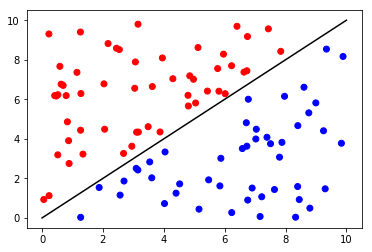

In [236]:
colormap=np.array(['red','blue'])
t=np.linspace(0,10,100)
plt.scatter(x[:,0],x[:,1],c=colormap[((y+1)/2).astype(int)])
plt.plot(t,-wopt[0]*t/wopt[1],c='black')

#question 3

In [244]:
w0=np.array([3,7])
sol=sgd(w0,1e-7,x,y)
sol

(array([ 0.19622721, -0.20630181]), 16232)

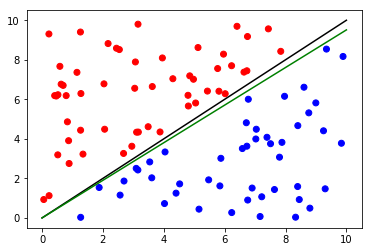

In [249]:
plt.scatter(x[:,0],x[:,1],c=colormap[((y+1)/2).astype(int)])
plt.plot(t,-wopt[0]*t/wopt[1],c='black')
plt.plot(t,-sol[0][0]*t/sol[0][1],c='green')

On voit que notre w* sépare assez bien les données. Si on fait le test plusieurs fois on observe qu'on ne tombe pas toujours sur la même droite, cependant le résultat est satisfaisant à chaque fois.

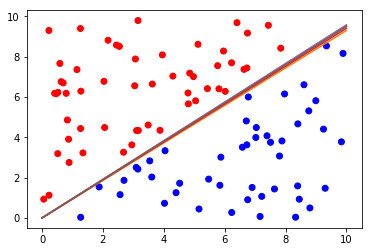

In [250]:
solutions = np.array([sol[0]])
for j in range(5):
  solutions = np.insert(solutions,solutions.shape[0],sgd(w0,1e-7,x,y)[0],axis=0)

plt.scatter(x[:,0],x[:,1],c=colormap[((y+1)/2).astype(int)])
for j in range(6):
  plt.plot(t,-solutions[j,0]*t/solutions[j,1])

#question4

On commence par un bruit de varience 1 (petit par rapport a 10)

In [255]:
noise = np.random.randn(100,2)
x_noisy = x + noise
x_noisy[0:10]

array([[ 5.72837485,  2.71703442],
       [ 6.54440367,  0.28845164],
       [ 6.50914035,  6.4380521 ],
       [ 7.23657972,  2.05879346],
       [ 1.27241873, -3.07155655],
       [-0.31335584,  2.66400546],
       [ 9.21329442,  1.69377733],
       [ 7.30678712,  4.04034914],
       [ 0.97798537,  2.29623971],
       [10.18661673, -0.20628989]])

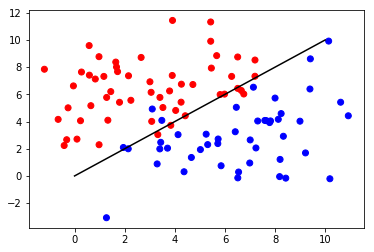

In [256]:
plt.scatter(x_noisy[:,0],x_noisy[:,1],c=colormap[((y+1)/2).astype(int)])
plt.plot(t,-wopt[0]*t/wopt[1],c='black')

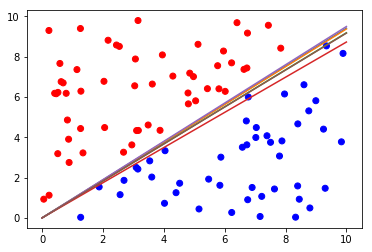

In [293]:
solutions = np.array([sgd(w0,1e-7,x_noisy,y)[0]])
for j in range(5):
  solutions = np.insert(solutions,solutions.shape[0],sgd(w0,1e-7,x_noisy,y)[0],axis=0)

plt.scatter(x[:,0],x[:,1],c=colormap[((y+1)/2).astype(int)])
for j in range(6):
  plt.plot(t,-solutions[j,0]*t/solutions[j,1])

In [294]:
for j in range(6):
  print(error_rate(solutions[j],x,y))

0.0
0.0
0.0
2.0
0.0
0.0


Dans le cas où la variance est petite l'algorithme est assez robuste. Recommenssons avec un bruit de varriance 25 :

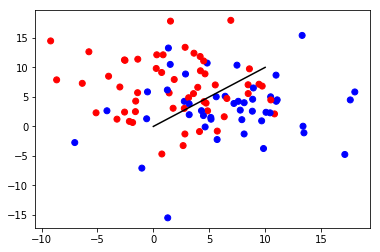

In [261]:
x_very_noisy = x + np.sqrt(25)*noise
plt.scatter(x_very_noisy[:,0],x_very_noisy[:,1],c=colormap[((y+1)/2).astype(int)])
plt.plot(t,-wopt[0]*t/wopt[1],c='black')

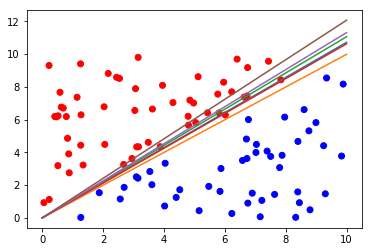

In [295]:
solutions = np.array([sgd(w0,1e-7,x_very_noisy,y)[0]])
for j in range(5):
  solutions = np.insert(solutions,solutions.shape[0],sgd(w0,1e-7,x_very_noisy,y)[0],axis=0)

plt.scatter(x[:,0],x[:,1],c=colormap[((y+1)/2).astype(int)])
for j in range(6):
  plt.plot(t,-solutions[j,0]*t/solutions[j,1])

In [296]:
for j in range(6):
  print(error_rate(solutions[j],x,y))

1.0
0.0
3.0
1.0
6.0
9.0


Je trouve que le résultat est assez satisfaisant, l'algorithme est assez robuste par rapport au données bruitées. 

#question 5

In [297]:
data = pd.read_csv('sample_data/data.csv')
data.drop(['Unnamed: 32'], axis='columns', inplace=True)
data[0:5]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
#on met +-1 pour le diagnosis
data['diagnosis_value']=2*(data['diagnosis']=='M')-1
x_train=data.iloc[0:int(len(data)*0.8),2:32]
y_train=data.iloc[0:int(len(data)*0.8),32]
x_test=data.iloc[int(len(data)*0.8):len(data),2:32]
y_test=data.iloc[int(len(data)*0.8):len(data),32]

In [300]:
w_0=np.ones(30)
solution = sgd(w_0,1e-3,x_train.values,y_train.values)
w_pred=solution[0]
solution

(array([ 3.17044320e-03,  2.71789665e-03,  2.19341418e-02,  2.07497893e-02,
         8.99564313e-05,  1.38657763e-04,  7.39628211e-05,  1.99910250e-05,
         1.25054930e-04,  4.76446882e-05,  1.34785840e-04,  2.12776135e-04,
         1.13956791e-03,  4.72108022e-03,  2.07886698e-05,  6.20750637e-05,
         7.05080059e-05,  1.65498635e-05,  4.58422790e-05,  5.56539587e-06,
         2.85739922e-03, -1.13571540e-03,  2.11185454e-02, -3.08721704e-02,
         1.64337387e-04,  3.65859910e-04,  2.78265720e-04,  5.31984351e-05,
         3.36590324e-04,  4.32284871e-05]), 212398)

In [302]:
error_rate(w_pred, x_test.values, y_test.values)

22.80701754385965

In [308]:
for i in range(10):
  print(error_rate(sgd(w_0,1e-3,x_train.values,y_train.values)[0], x_test.values, y_test.values))  

31.57894736842105
30.70175438596491
30.70175438596491
28.07017543859649
84.21052631578948
24.56140350877193
22.80701754385965
6.140350877192983
60.526315789473685
23.68421052631579


les résultats ne sont pas trés bon. On peut essayer dans un espace plus petit.


In [0]:
x_train=data.iloc[0:int(len(data)*0.8),2:6]
x_test=data.iloc[int(len(data)*0.8):len(data),2:6]
w_0=np.ones(4)

In [315]:
for i in range(10):
  print(error_rate(sgd(w_0,1e-5,x_train.values,y_train.values)[0], x_test.values, y_test.values))

36.8421052631579
8.771929824561404
15.789473684210526
60.526315789473685
24.56140350877193
26.31578947368421
41.228070175438596
62.280701754385966
22.80701754385965
21.05263157894737


Ce n'est guére mieux. Le fait qu'on ai des résultats trés différents veut dire qu'on dépand beaucoup du coté aléatoire de l'algorithme. Cela veut sans doute dire qu'on s'arréte trop tôt, mais évidemment il y a un trade off a faire avec le temps d'éxecution.

In [316]:
for i in range(10):
  print(error_rate(sgd(w_0,1e-7,x_train.values,y_train.values)[0], x_test.values, y_test.values))

22.80701754385965
91.2280701754386
16.666666666666668
12.280701754385966
20.17543859649123
22.80701754385965
37.719298245614034
12.280701754385966
7.894736842105263
68.42105263157895


On se rend compte que les résultats sont trés variables, ce qu'on peut faire c'est prendre une moyenne pondérée en fonction de la performance associée a chaque w_pred. où on peut choisir celui qui a la meilleur performance direcrement. 